# Penguin Dataset EDA.
We would example the data from the penguin dataset, for example examine various features like categorical and numeric.
## Things we would do
- Look at the shape of data, missing values.
- Summary statistics for numeric.
- Dimentions of categorical values.
- Missing values.
- Ways to fix missing values.
- Data distribution for individual feature.
- Any correlation between existing features.
- Summary of any meaningful insights we find in the dataset.

Lets first import all the libraries we need for the project. We would use:
- Pandas for Dataframe as well as integration with mathplot.
- Matplot for visualization.
- Numpy for any computation.
- Seaborn if needed for additional visualization.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

Now we would load the CSV file into dataframe for analysis. We would print first few rows and the shape of the dataset.

In [65]:
data = pd.read_csv("./data/penguins_size.csv")
print(data.head())
print("\n\nShape:")
print(data.shape)

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen              39.1             18.7              181.0       3750.0    MALE
1  Adelie  Torgersen              39.5             17.4              186.0       3800.0  FEMALE
2  Adelie  Torgersen              40.3             18.0              195.0       3250.0  FEMALE
3  Adelie  Torgersen               NaN              NaN                NaN          NaN     NaN
4  Adelie  Torgersen              36.7             19.3              193.0       3450.0  FEMALE


Shape:
(344, 7)


Lets look at basic information. Which include the datatypes.

In [66]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [67]:
print(data.isna().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [68]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Now lets also look at categorical features about their dimentionality.

In [69]:
species_dimentions = data['species'].value_counts()
island_dimentions = data['island'].value_counts()
sex_dimentions = data['sex'].value_counts()

print(species_dimentions, end="\n\n")
print(island_dimentions, end="\n\n")
print(sex_dimentions)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


Lets fix the  . sex and make it nan for time being. 

In [70]:
data["sex"] = data["sex"].replace(".", np.nan)

In [71]:
species_dimentions = data['species'].value_counts()
island_dimentions = data['island'].value_counts()
sex_dimentions = data['sex'].value_counts()

print(species_dimentions, end="\n\n")
print(island_dimentions, end="\n\n")
print(sex_dimentions)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


In [72]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Lets look at all the rows where we have NaN values to see if there is any pattern. Based on that lets identify the right strategy for it.

In [73]:
data_with_nan = data[data.isna().any(axis=1)]
print(data_with_nan)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3    Adelie  Torgersen               NaN              NaN                NaN          NaN  NaN
8    Adelie  Torgersen              34.1             18.1              193.0       3475.0  NaN
9    Adelie  Torgersen              42.0             20.2              190.0       4250.0  NaN
10   Adelie  Torgersen              37.8             17.1              186.0       3300.0  NaN
11   Adelie  Torgersen              37.8             17.3              180.0       3700.0  NaN
47   Adelie      Dream              37.5             18.9              179.0       2975.0  NaN
246  Gentoo     Biscoe              44.5             14.3              216.0       4100.0  NaN
286  Gentoo     Biscoe              46.2             14.4              214.0       4650.0  NaN
324  Gentoo     Biscoe              47.3             13.8              216.0       4725.0  NaN
336  Gentoo     Biscoe              44.5          

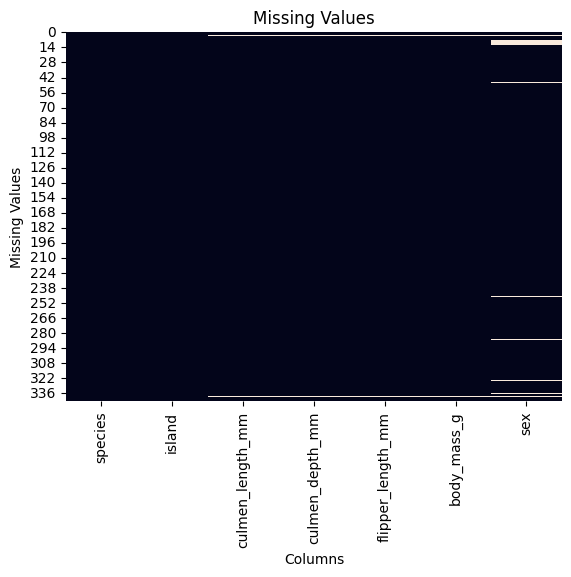

In [74]:
ax = plt.axes()
sns.heatmap(data.isna(), cbar=False, ax=ax)
plt.title("Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize = 10) 
plt.ylabel("Missing Values", fontsize = 10)
plt.show()

We see that for 2 rows all the features are missing and there are 9 rows where only sex is missing.
- For the rows where all features are missing lets drop it. This is because one of them is for Adelie and one is for Gantoo. Both have good representation in data.

In [75]:
key_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
all_na = data[data[key_features].isna().all(axis=1)]
print(all_na)
all_na_index = all_na.index
print(all_na_index)
data = data.drop(all_na_index)
print(data.shape)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3    Adelie  Torgersen               NaN              NaN                NaN          NaN  NaN
339  Gentoo     Biscoe               NaN              NaN                NaN          NaN  NaN
Index([3, 339], dtype='int64')
(342, 7)


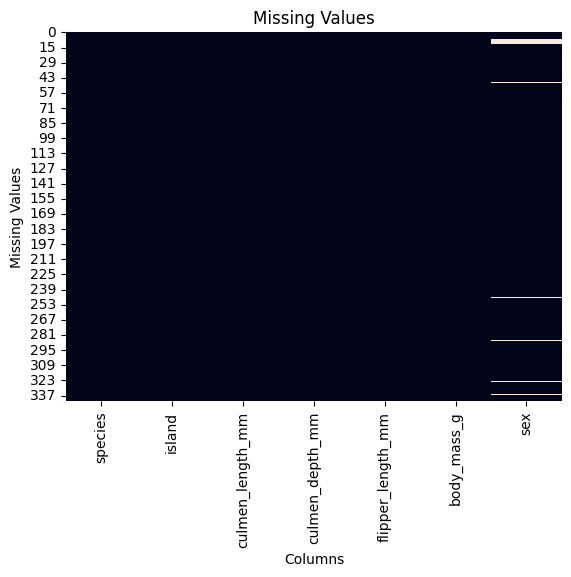

In [76]:
ax = plt.axes()
sns.heatmap(data.isna(), cbar=False, ax=ax)
plt.title("Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize = 10) 
plt.ylabel("Missing Values", fontsize = 10)
plt.show()

Lets do analysis for features which have predictive power if any for sex. Lets have a subset where all nan features are dropped.

In [77]:
clean_data = data.dropna()
print(clean_data.shape)
clean_data.head()

(333, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


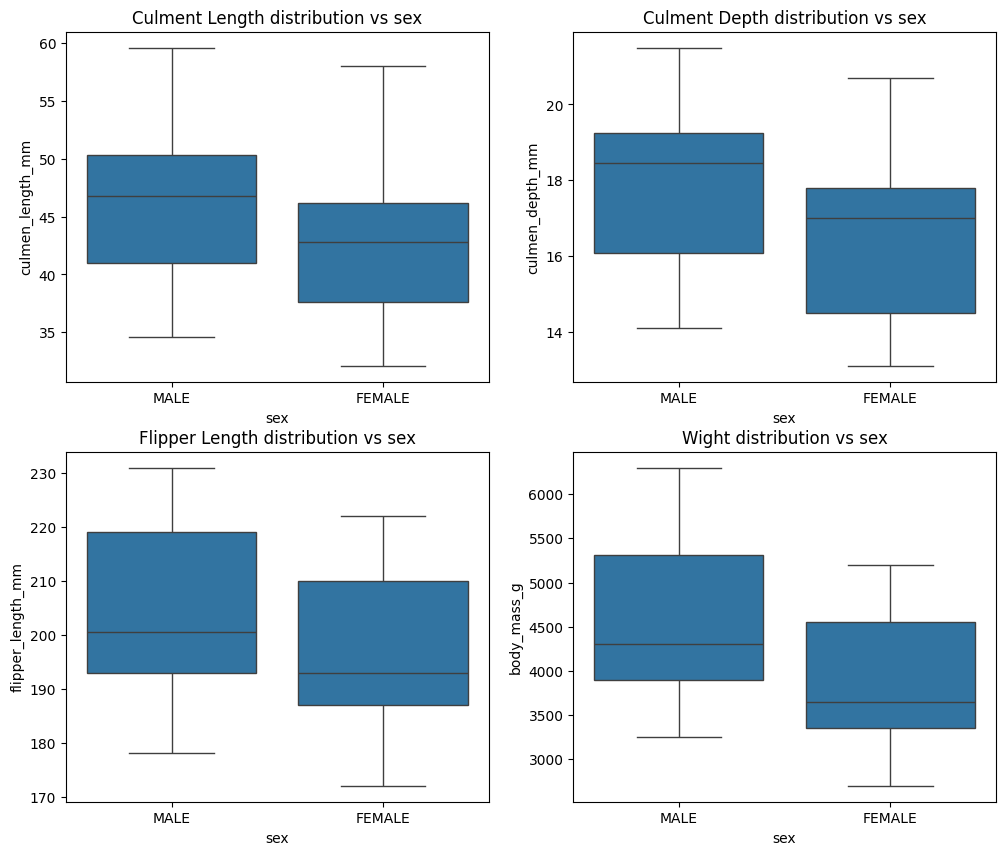

In [78]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="sex", y="culmen_length_mm", data=clean_data)
plt.title("Culment Length distribution vs sex")

plt.subplot(2,2,2)
sns.boxplot(x="sex", y="culmen_depth_mm", data=clean_data)
plt.title("Culment Depth distribution vs sex")

plt.subplot(2,2,3)
sns.boxplot(x="sex", y="flipper_length_mm", data=clean_data)
plt.title("Flipper Length distribution vs sex")

plt.subplot(2,2,4)
sns.boxplot(x="sex", y="body_mass_g", data=clean_data)
plt.title("Wight distribution vs sex")


plt.show()

In [79]:
clean_data.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_binary
culmen_length_mm           1.000000        -0.228626           0.653096     0.589451    0.344078
culmen_depth_mm           -0.228626         1.000000          -0.577792    -0.472016    0.372673
flipper_length_mm          0.653096        -0.577792           1.000000     0.872979    0.255169
body_mass_g                0.589451        -0.472016           0.872979     1.000000    0.424987
sex_binary                 0.344078         0.372673           0.255169     0.424987    1.000000


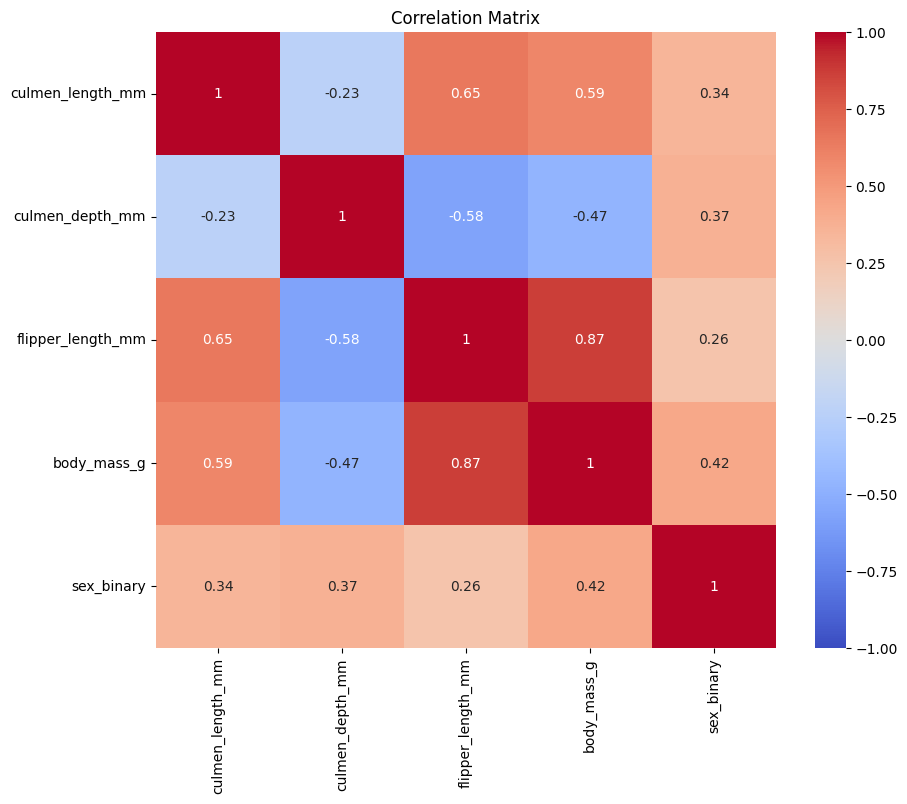

In [80]:
corr_data = clean_data.copy()
corr_data["sex_binary"] = corr_data["sex"].map({"MALE" : 1, "FEMALE" : 0})
correlation = corr_data[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex_binary"]].corr()
print(correlation)

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x_train = clean_data[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
y_train = clean_data["sex"]

missing_sex = data[data["sex"].isna()]
x_predict = missing_sex[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]

#scale features.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_predict_scaled = scaler.transform(x_predict)

#train the model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

#predict missing values.
predictions = model.predict(x_predict_scaled)

print(predictions)

for idx, pred in zip(missing_sex.index, predictions):
    data.loc[idx, "sex"] = pred

print(data.info)
print(data.isna().sum())

['FEMALE' 'MALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE'
 'MALE']
<bound method DataFrame.info of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen              39.1             18.7              181.0       3750.0    MALE
1    Adelie  Torgersen              39.5             17.4              186.0       3800.0  FEMALE
2    Adelie  Torgersen              40.3             18.0              195.0       3250.0  FEMALE
4    Adelie  Torgersen              36.7             19.3              193.0       3450.0  FEMALE
5    Adelie  Torgersen              39.3             20.6              190.0       3650.0    MALE
..      ...        ...               ...              ...                ...          ...     ...
338  Gentoo     Biscoe              47.2             13.7              214.0       4925.0  FEMALE
340  Gentoo     Biscoe              46.8             14.3              215.0       4850.0  FEMALE
341  G

Lets look at distribution again - it should not change with our strategy.

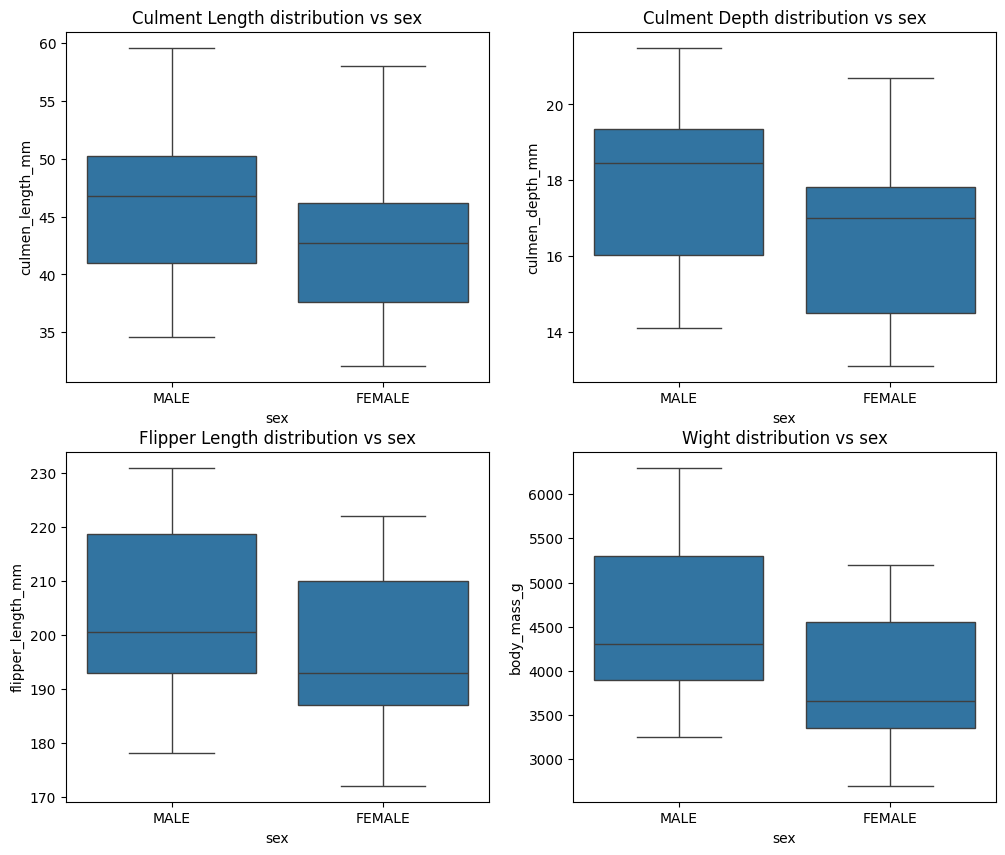

In [82]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="sex", y="culmen_length_mm", data=data)
plt.title("Culment Length distribution vs sex")

plt.subplot(2,2,2)
sns.boxplot(x="sex", y="culmen_depth_mm", data=data)
plt.title("Culment Depth distribution vs sex")

plt.subplot(2,2,3)
sns.boxplot(x="sex", y="flipper_length_mm", data=data)
plt.title("Flipper Length distribution vs sex")

plt.subplot(2,2,4)
sns.boxplot(x="sex", y="body_mass_g", data=data)
plt.title("Wight distribution vs sex")


plt.show()

Now lets look at data distributions. 
- Numeric features. How does the distribution looks like.
- As we have already seen MALE and FEMALE have different distribution so see if distribution by SEX is normal distribution.
- Next categorical features - Bar chart just to see the distribution across features.
- Next is scatter plot to see association between 2 features.


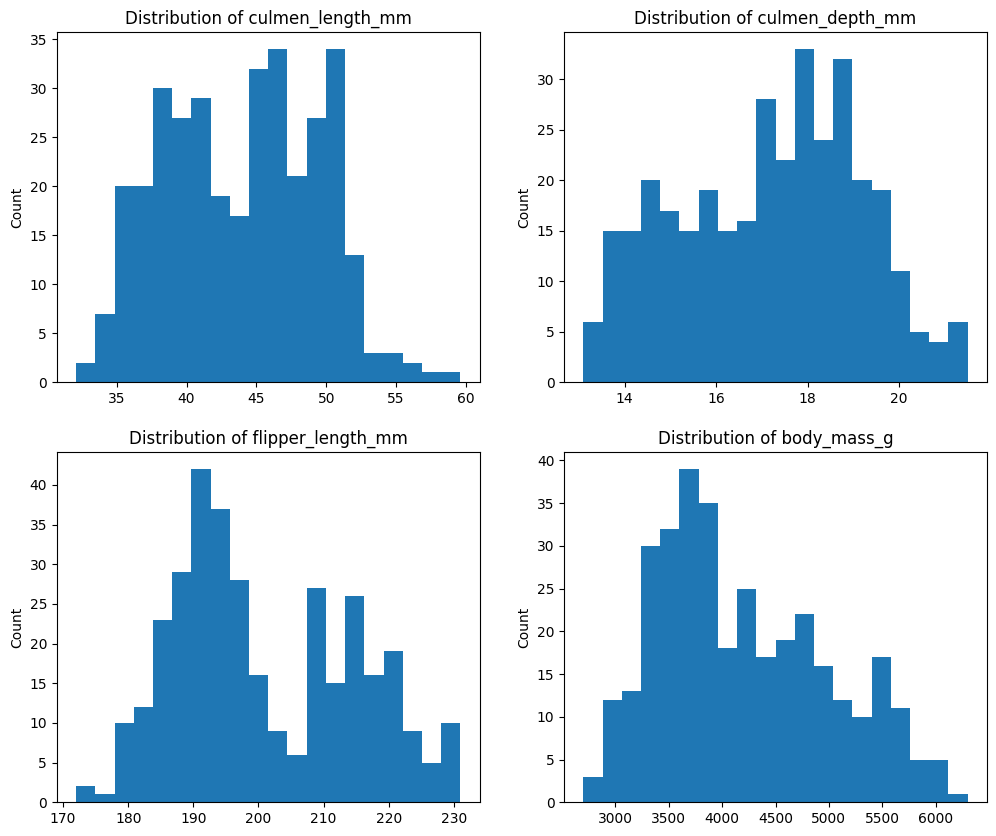

In [87]:
fig, axis = plt.subplots(2, 2, figsize=(12,10))

axis[0, 0].hist(data["culmen_length_mm"], bins = 20)
axis[0, 0].set_ylabel("Count")
axis[0, 0].set_title("Distribution of culmen_length_mm")

axis[0, 1].hist(data["culmen_depth_mm"], bins = 20)
axis[0, 1].set_ylabel("Count")
axis[0, 1].set_title("Distribution of culmen_depth_mm")

axis[1, 0].hist(data["flipper_length_mm"], bins = 20)
axis[1, 0].set_ylabel("Count")
axis[1, 0].set_title("Distribution of flipper_length_mm")

axis[1, 1].hist(data["body_mass_g"], bins = 20)
axis[1, 1].set_ylabel("Count")
axis[1, 1].set_title("Distribution of body_mass_g")

plt.show()


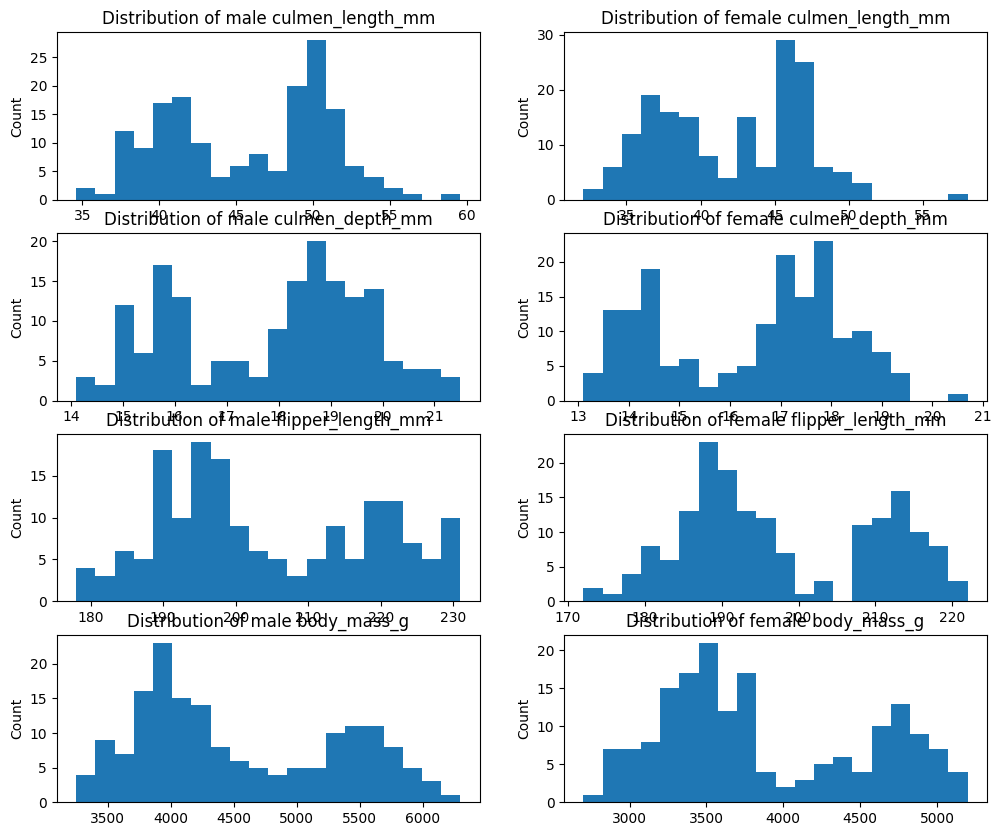

In [89]:
fig, axis = plt.subplots(4, 2, figsize=(12,10))

male_data = data[data["sex"] == "MALE"]
female_data = data[data["sex"] == "FEMALE"]

axis[0, 0].hist(male_data["culmen_length_mm"], bins = 20)
axis[0, 0].set_ylabel("Count")
axis[0, 0].set_title("Distribution of male culmen_length_mm")

axis[0, 1].hist(female_data["culmen_length_mm"], bins = 20)
axis[0, 1].set_ylabel("Count")
axis[0, 1].set_title("Distribution of female culmen_length_mm")

axis[1, 0].hist(male_data["culmen_depth_mm"], bins = 20)
axis[1, 0].set_ylabel("Count")
axis[1, 0].set_title("Distribution of male culmen_depth_mm")

axis[1, 1].hist(female_data["culmen_depth_mm"], bins = 20)
axis[1, 1].set_ylabel("Count")
axis[1, 1].set_title("Distribution of female culmen_depth_mm")

axis[2, 0].hist(male_data["flipper_length_mm"], bins = 20)
axis[2, 0].set_ylabel("Count")
axis[2, 0].set_title("Distribution of male flipper_length_mm")

axis[2, 1].hist(female_data["flipper_length_mm"], bins = 20)
axis[2, 1].set_ylabel("Count")
axis[2, 1].set_title("Distribution of female flipper_length_mm")

axis[3, 0].hist(male_data["body_mass_g"], bins = 20)
axis[3, 0].set_ylabel("Count")
axis[3, 0].set_title("Distribution of male body_mass_g")

axis[3, 1].hist(female_data["body_mass_g"], bins = 20)
axis[3, 1].set_ylabel("Count")
axis[3, 1].set_title("Distribution of female body_mass_g")
plt.show()

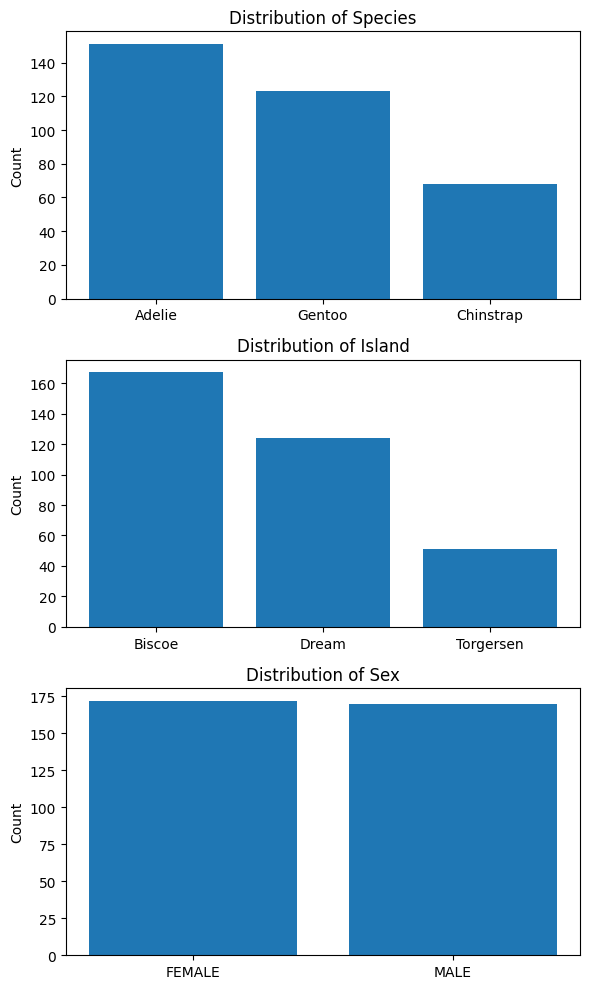

In [90]:
species_distribution = data["species"].value_counts()
island_distribution = data["island"].value_counts()
sex_distribution = data["sex"].value_counts()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].bar(species_distribution.index, species_distribution.values)
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of Species")

axs[1].bar(island_distribution.index, island_distribution.values)
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of Island")

axs[2].bar(sex_distribution.index, sex_distribution.values)
axs[2].set_ylabel("Count")
axs[2].set_title("Distribution of Sex")

plt.tight_layout()
plt.show()

